In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [155]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/207940.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-13,285000.0,300000.0,284000.0,285500.0,285500.0,283510.0
1,2019-08-14,291000.0,295500.0,287000.0,290000.0,290000.0,118802.0
2,2019-08-16,286000.0,291500.0,285000.0,287500.0,287500.0,98986.0
3,2019-08-19,290000.0,291500.0,282000.0,283500.0,283500.0,65206.0
4,2019-08-20,284500.0,286500.0,278000.0,283500.0,283500.0,74786.0


In [156]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-13,285000.0,300000.0,284000.0,285500.0,285500.0,283510.0
2019-08-14,291000.0,295500.0,287000.0,290000.0,290000.0,118802.0
2019-08-16,286000.0,291500.0,285000.0,287500.0,287500.0,98986.0
2019-08-19,290000.0,291500.0,282000.0,283500.0,283500.0,65206.0
2019-08-20,284500.0,286500.0,278000.0,283500.0,283500.0,74786.0


In [157]:
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2019-08-13    285500.0
2019-08-14    290000.0
2019-08-16    287500.0
2019-08-19    283500.0
2019-08-20    283500.0
Name: Close, dtype: float64

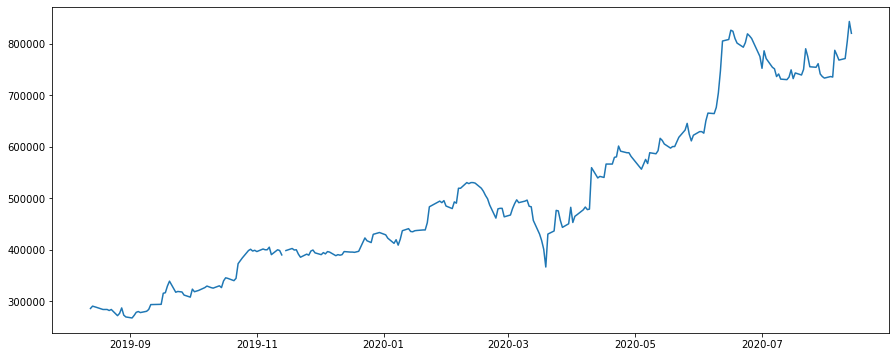

In [158]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [159]:
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2019-11-14   NaN
Name: Close, dtype: float64

In [160]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')
ts[ts.isna()]    # 다시 NaN 확인

Series([], Name: Close, dtype: float64)

In [161]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


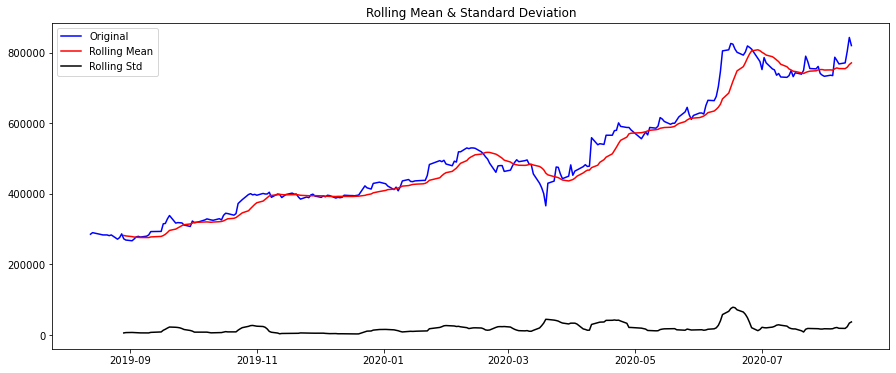

In [162]:
plot_rolling_statistics(ts, window=12)

In [163]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [164]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.002689
p-value                          0.958754
#Lags Used                       0.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


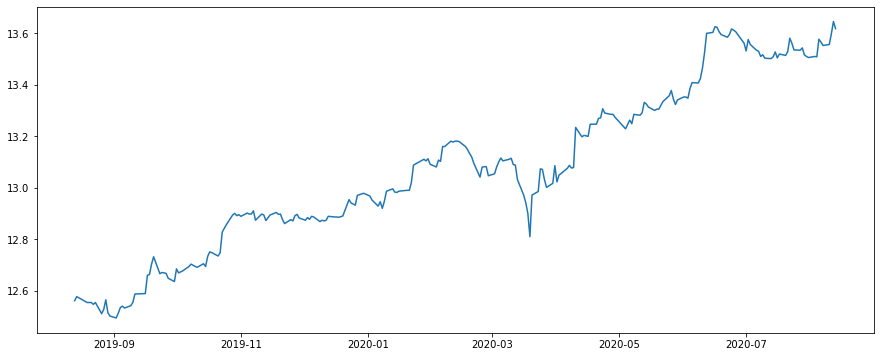

In [165]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [166]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.626393
p-value                          0.864906
#Lags Used                       0.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


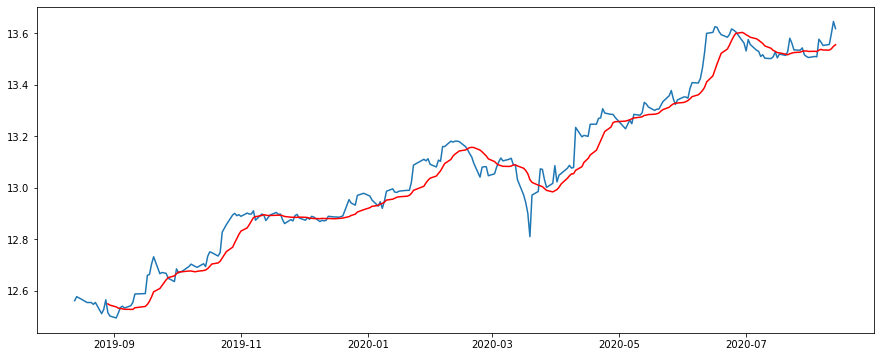

In [167]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [168]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Date
2019-08-13         NaN
2019-08-14         NaN
2019-08-16         NaN
2019-08-19         NaN
2019-08-20         NaN
2019-08-21         NaN
2019-08-22         NaN
2019-08-23         NaN
2019-08-26         NaN
2019-08-27         NaN
2019-08-28         NaN
2019-08-29   -0.034367
2019-08-30   -0.042333
2019-09-02   -0.042910
2019-09-03   -0.019738
Name: Close, dtype: float64

In [169]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2019-08-29   -0.034367
2019-08-30   -0.042333
2019-09-02   -0.042910
2019-09-03   -0.019738
2019-09-04    0.003713
2019-09-05    0.010279
2019-09-06    0.004880
2019-09-09    0.014294
2019-09-10    0.026716
2019-09-11    0.053326
2019-09-16    0.049908
2019-09-17    0.112700
2019-09-18    0.103528
2019-09-19    0.127064
2019-09-20    0.135758
Name: Close, dtype: float64

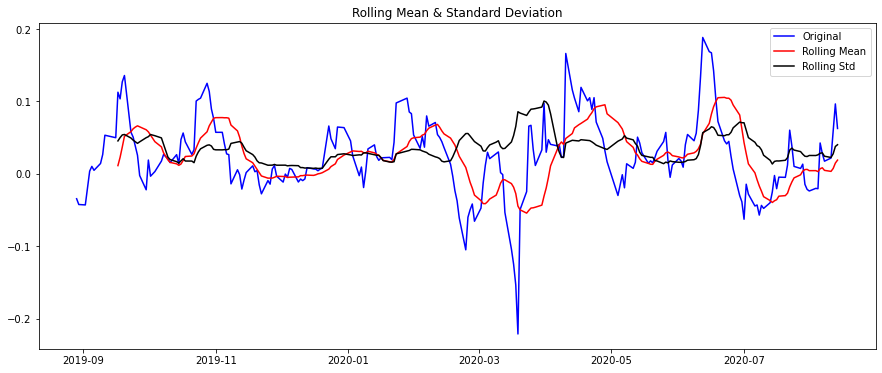

In [170]:
plot_rolling_statistics(ts_log_moving_avg)

In [171]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.819590
p-value                          0.000050
#Lags Used                       2.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


In [172]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

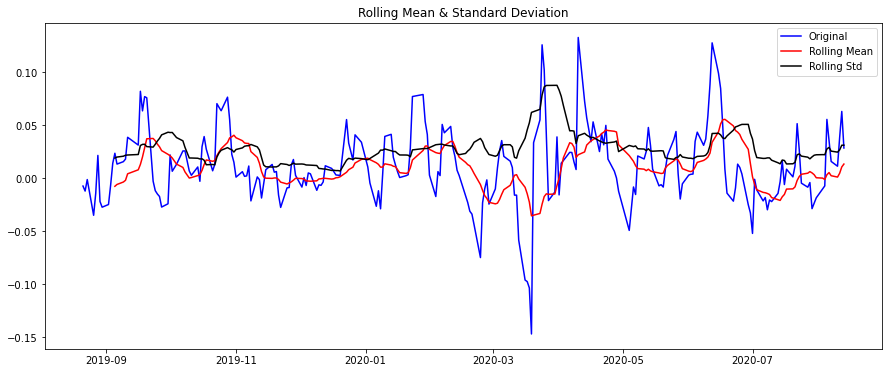

In [173]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [174]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                -6.951049e+00
p-value                        9.690869e-10
#Lags Used                     2.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64


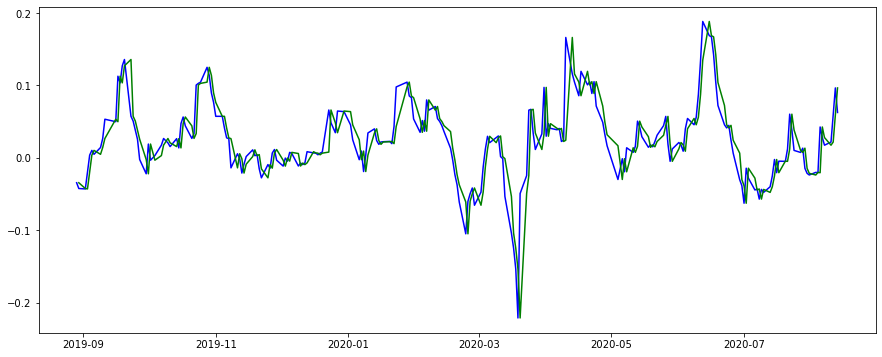

In [175]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

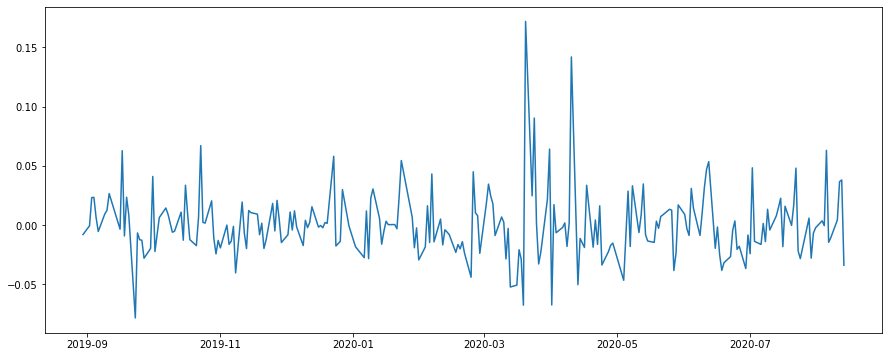

In [176]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

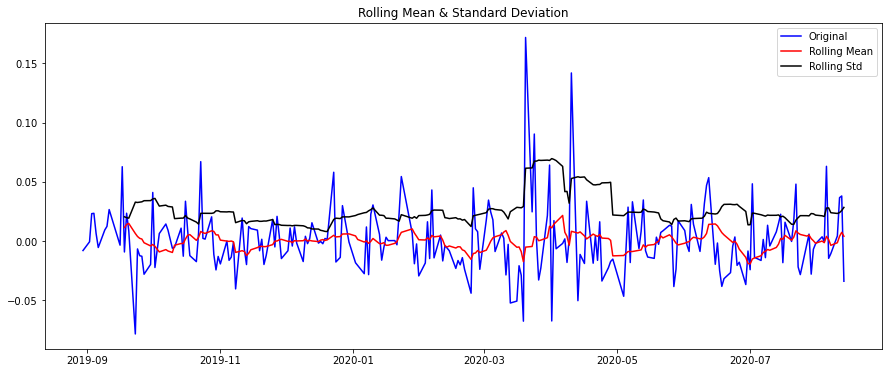

In [177]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [178]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.558188e+01
p-value                        1.928019e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [179]:
ts_log.head()

Date
2019-08-13    12.561997
2019-08-14    12.577636
2019-08-16    12.568978
2019-08-19    12.554967
2019-08-20    12.554967
Name: Close, dtype: float64

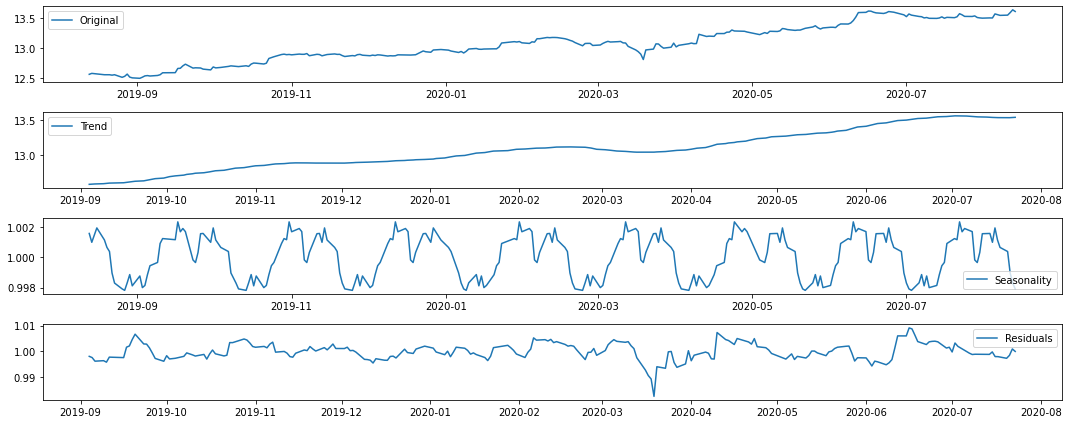

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


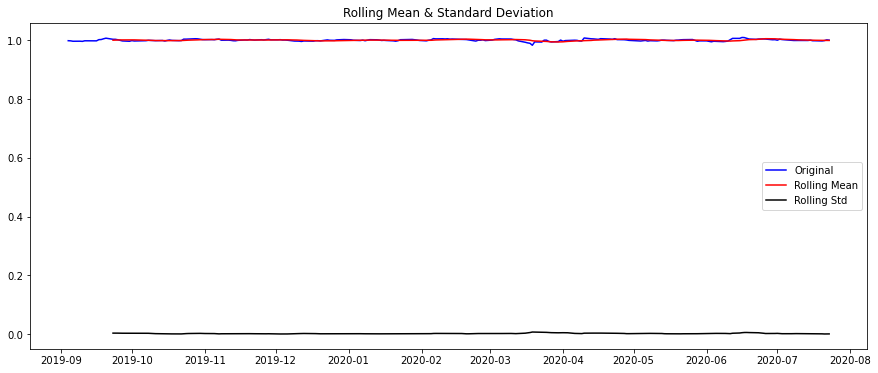

In [181]:
plot_rolling_statistics(residual)

In [182]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.926038
p-value                          0.000031
#Lags Used                       0.000000
Number of Observations Used    218.000000
Critical Value (1%)             -3.460708
Critical Value (5%)             -2.874891
Critical Value (10%)            -2.573886
dtype: float64


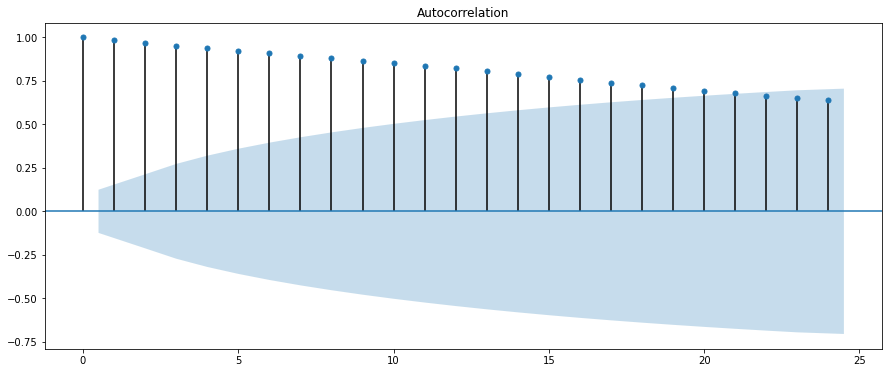

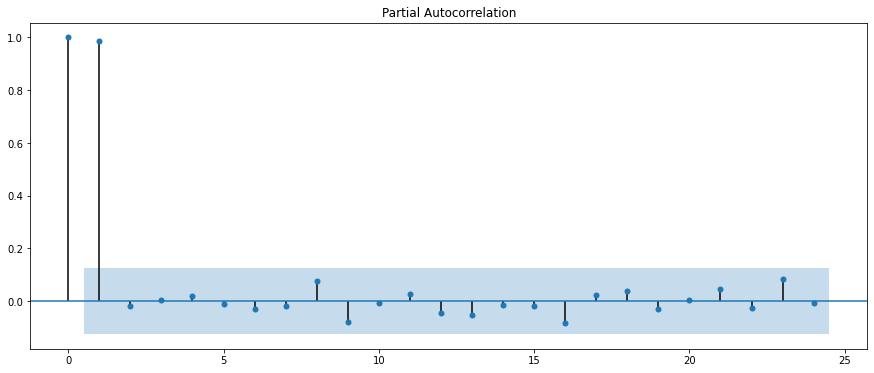

In [183]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.615747e+01
p-value                        4.502207e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


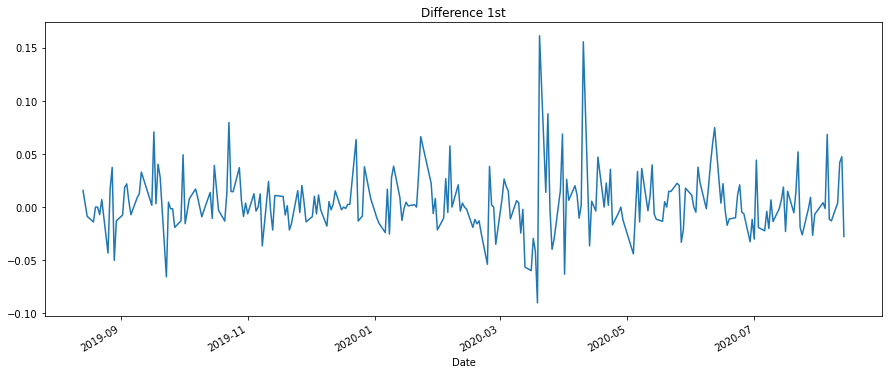

In [184]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.016262e+00
p-value                        2.134862e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


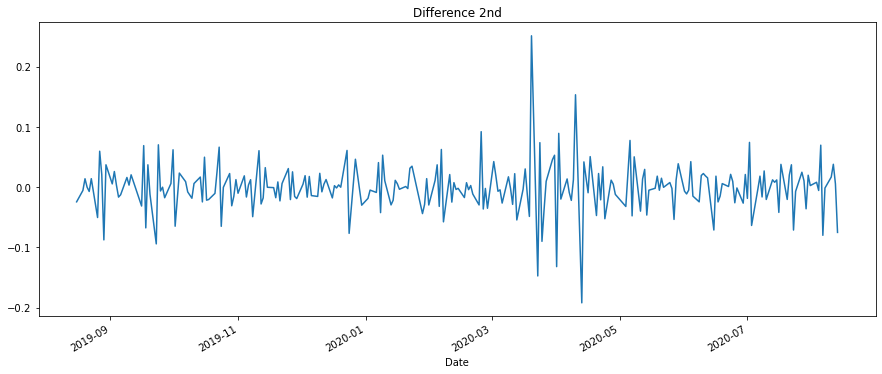

In [185]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

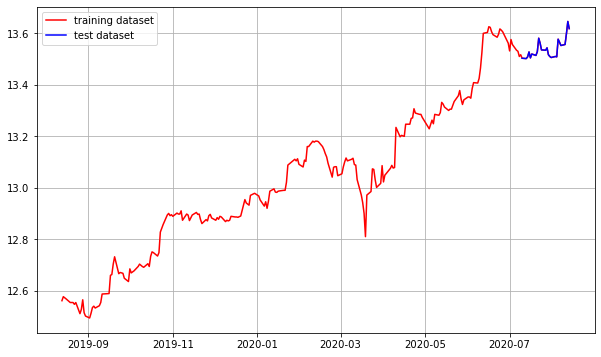

In [186]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [187]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2019-08-13    12.561997
2019-08-14    12.577636
Name: Close, dtype: float64
(224,)
(25,)


In [200]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 8))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  223
Model:                 ARIMA(1, 1, 8)   Log Likelihood                 473.644
Method:                       css-mle   S.D. of innovations              0.029
Date:                Thu, 13 Aug 2020   AIC                           -925.289
Time:                        17:04:07   BIC                           -887.810
Sample:                             1   HQIC                          -910.159
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0042      0.002      2.173      0.030       0.000       0.008
ar.L1.D.Close     0.1265      0.315      0.402      0.688      -0.491       0.744
ma.L1.D.Close    -0.1593      0.309     

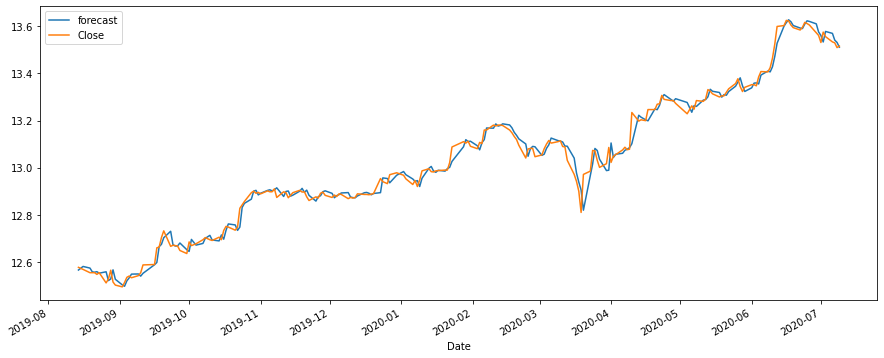

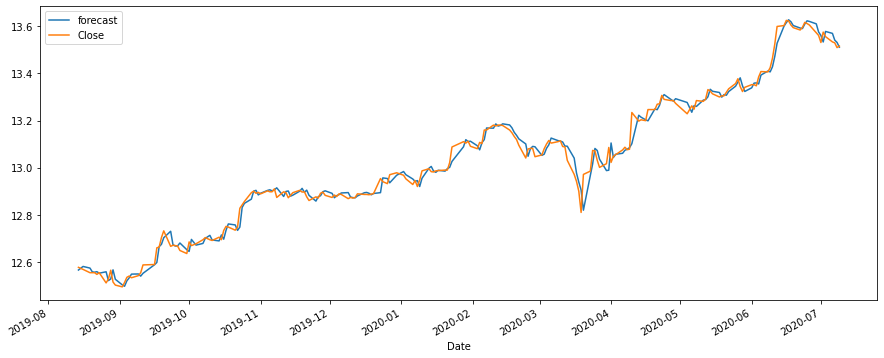

In [201]:
fitted_m.plot_predict()

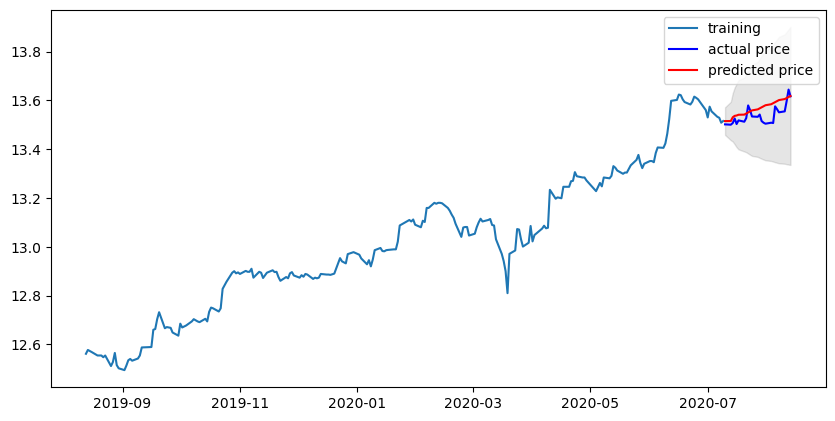

In [202]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  954339398.8852992
MAE:  25709.308403690007
RMSE:  30892.384156702752
MAPE: 3.42%


삼성바이오
대상 데이터를 한정지어 mape를 높였으며 q값을 8로 진행하여 추가 향상